## Chapter 10: Multi-Layer Perceptrons with Keras

Now that I've got [Tensorflow on this machine that doesn't have AVX support](https://www.eggwall.com/2020/09/compiling-tensorflow-without-avx.html), let's take it for a ride.


In [1]:
# Common imports

import matplotlib.cm as cm
from matplotlib.image import imread
# import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpl_toolkits.mplot3d.axes3d as p3

import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

print("TF version ", tf.__version__)
print("Keras version ", keras.__version__)

TF version  2.3.0
Keras version  2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print (X_train_full.shape)
print (X_train_full.dtype)

4423680/4422102 [==============================] - 6s 1us/step
(60000, 28, 28)
uint8


In [3]:
print (X_train_full.shape)
print (X_train_full.dtype)

(60000, 28, 28)
uint8


Let's split this into a validation set. First 5000 are kept aside for validation.

Pixel densities in the attributes are 0-255, so scaling them down to \[0,1\].
Notice how we specify 255.0 otherwise integer division will lead to either 0 or 1.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000]        , y_train_full[5000:]
X_test = X_test / 255.0

These class-names are specified on the [Keras website](https://www.tensorflow.org/tutorials/keras/classification)

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [12]:
class_names[y_train[0]]

'Coat'

Let's look at a single image. By now I am good enough to print this stuff out.

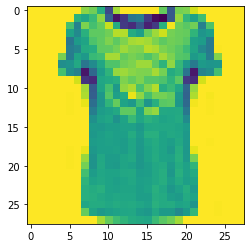

In [15]:
plt.imshow(1 - X_train[1])

And let's create a Tensorflow network with Keras.

In [17]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

# This is another way of creating it:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.7015 - accuracy: 0.7694 - val_loss: 0.5748 - val_accuracy: 0.7924
Epoch 2/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.4864 - accuracy: 0.8314 - val_loss: 0.4725 - val_accuracy: 0.8358
Epoch 3/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.4426 - accuracy: 0.8451 - val_loss: 0.4166 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.4159 - accuracy: 0.8528 - val_loss: 0.4072 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.3955 - accuracy: 0.8620 - val_loss: 0.3893 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.3798 - accuracy: 0.8653 - val_loss: 0.3668 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.3651 - accuracy: 0.8707 - val_loss: 0.3612 -

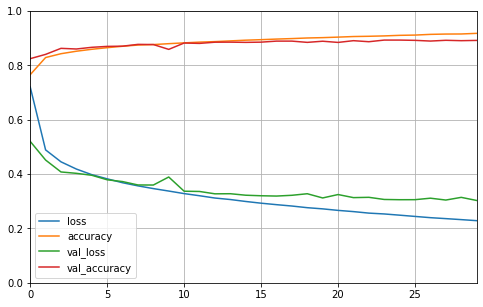

In [14]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

This looks good, and convergence has been reached. Accuracy is close to validation accuracy.

In [30]:
# The same model as earlier, but with a different learning rate.
model_lr = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Got a learning rate example from here: https://keras.io/api/optimizers/
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

model_lr.compile(loss="sparse_categorical_crossentropy",
                 optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
                 metrics=["accuracy"])
history_lr = model_lr.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 40s 24ms/step - loss: 0.7146 - accuracy: 0.7642 - val_loss: 0.5144 - val_accuracy: 0.8260
Epoch 2/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.4927 - accuracy: 0.8298 - val_loss: 0.4485 - val_accuracy: 0.8474
Epoch 3/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.4444 - accuracy: 0.8449 - val_loss: 0.4138 - val_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 42s 24ms/step - loss: 0.4185 - accuracy: 0.8537 - val_loss: 0.4003 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.3991 - accuracy: 0.8613 - val_loss: 0.4304 - val_accuracy: 0.8504
Epoch 6/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.3821 - accuracy: 0.8669 - val_loss: 0.3776 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.3694 - accuracy: 0.8703 - val_loss: 0.3685 -

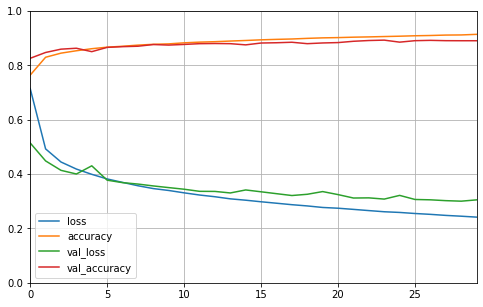

In [35]:
import pandas as pd

pd.DataFrame(history_lr.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

# Batch processing, for later

For later, run with many more epochs and see if the performance improves considerably

In [31]:
# The same model as earlier, but with many more epochs than earlier.
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
history2 = model2.fit(X_train, y_train, epochs=300,
                   validation_data=(X_valid, y_valid))

Epoch 1/300
1719/1719 [==============================] - 43s 25ms/step - loss: 0.7163 - accuracy: 0.7680 - val_loss: 0.5420 - val_accuracy: 0.8142
Epoch 2/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.4888 - accuracy: 0.8305 - val_loss: 0.4649 - val_accuracy: 0.8332
Epoch 3/300
1719/1719 [==============================] - 43s 25ms/step - loss: 0.4449 - accuracy: 0.8432 - val_loss: 0.4219 - val_accuracy: 0.8536
Epoch 4/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.4173 - accuracy: 0.8546 - val_loss: 0.4026 - val_accuracy: 0.8648
Epoch 5/300
1719/1719 [==============================] - 43s 25ms/step - loss: 0.3968 - accuracy: 0.8616 - val_loss: 0.3969 - val_accuracy: 0.8602
Epoch 6/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.3804 - accuracy: 0.8665 - val_loss: 0.3721 - val_accuracy: 0.8690
Epoch 7/300
1719/1719 [==============================] - 43s 25ms/step - loss: 0.3669 - accuracy: 0.8700 - val_loss: 0

1719/1719 [==============================] - 42s 24ms/step - loss: 0.0581 - accuracy: 0.9811 - val_loss: 0.3833 - val_accuracy: 0.8912
Epoch 115/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0586 - accuracy: 0.9809 - val_loss: 0.3756 - val_accuracy: 0.8992
Epoch 116/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0569 - accuracy: 0.9814 - val_loss: 0.3876 - val_accuracy: 0.8946
Epoch 117/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0548 - accuracy: 0.9820 - val_loss: 0.3898 - val_accuracy: 0.8978
Epoch 118/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0553 - accuracy: 0.9819 - val_loss: 0.4048 - val_accuracy: 0.8928
Epoch 119/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0550 - accuracy: 0.9823 - val_loss: 0.3868 - val_accuracy: 0.8956
Epoch 120/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0

1719/1719 [==============================] - 42s 24ms/step - loss: 0.0194 - accuracy: 0.9947 - val_loss: 0.5086 - val_accuracy: 0.8944
Epoch 170/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0198 - accuracy: 0.9947 - val_loss: 0.4802 - val_accuracy: 0.8952
Epoch 171/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0186 - accuracy: 0.9952 - val_loss: 0.5070 - val_accuracy: 0.8930
Epoch 172/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0197 - accuracy: 0.9946 - val_loss: 0.4925 - val_accuracy: 0.8972
Epoch 173/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0165 - accuracy: 0.9962 - val_loss: 0.5092 - val_accuracy: 0.8954
Epoch 174/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0161 - accuracy: 0.9960 - val_loss: 0.4912 - val_accuracy: 0.8974
Epoch 175/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0167 - accuracy: 0.9960 - val_loss: 0

1719/1719 [==============================] - 42s 24ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.5731 - val_accuracy: 0.8974
Epoch 225/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.5663 - val_accuracy: 0.8988
Epoch 226/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.5693 - val_accuracy: 0.8986
Epoch 227/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.5749 - val_accuracy: 0.8982
Epoch 228/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.5774 - val_accuracy: 0.8980
Epoch 229/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.5684 - val_accuracy: 0.8974
Epoch 230/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0026 - accuracy: 0.9999 - val_loss: 0

1719/1719 [==============================] - 42s 25ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6195 - val_accuracy: 0.8988
Epoch 280/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6193 - val_accuracy: 0.8984
Epoch 281/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6211 - val_accuracy: 0.8984
Epoch 282/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6214 - val_accuracy: 0.8980
Epoch 283/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6219 - val_accuracy: 0.8980
Epoch 284/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6246 - val_accuracy: 0.8980
Epoch 285/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0

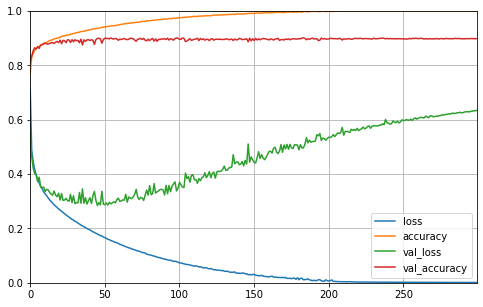

In [36]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

This looks overfitted. The accuracy is 100% but the validation accuracy is 91%.

In [32]:
# A deeper model than earlier, but with as many epochs as the first.
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model3.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
history3 = model3.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.7099 - accuracy: 0.7638 - val_loss: 0.4921 - val_accuracy: 0.8350
Epoch 2/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.4708 - accuracy: 0.8358 - val_loss: 0.4589 - val_accuracy: 0.8362
Epoch 3/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.4236 - accuracy: 0.8506 - val_loss: 0.3978 - val_accuracy: 0.8662
Epoch 4/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.3954 - accuracy: 0.8593 - val_loss: 0.3922 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.3751 - accuracy: 0.8652 - val_loss: 0.3676 - val_accuracy: 0.8742
Epoch 6/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.3585 - accuracy: 0.8711 - val_loss: 0.3486 - val_accuracy: 0.8776
Epoch 7/30
1719/1719 [==============================] - 59s 35ms/step - loss: 0.3449 - accuracy: 0.8756 - val_loss: 0.3486 -

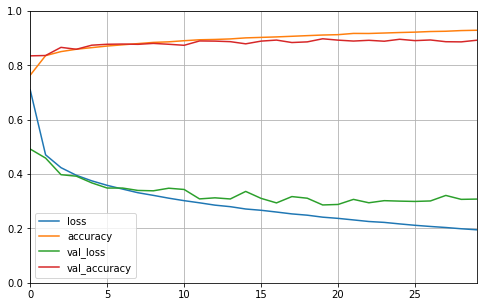

In [38]:
import pandas as pd

pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

This looks good, and convergence has been reached. Accuracy is close to validation accuracy.

In [33]:
# A deeper model than earlier, but constraining the input layer and expanding again
model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model4.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
history4 = model4.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 42s 24ms/step - loss: 0.7988 - accuracy: 0.7269 - val_loss: 0.5158 - val_accuracy: 0.8262
Epoch 2/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.4945 - accuracy: 0.8251 - val_loss: 0.4614 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.4401 - accuracy: 0.8448 - val_loss: 0.4393 - val_accuracy: 0.8462
Epoch 4/30
1719/1719 [==============================] - 42s 24ms/step - loss: 0.4095 - accuracy: 0.8534 - val_loss: 0.3902 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.3856 - accuracy: 0.8620 - val_loss: 0.3803 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 42s 24ms/step - loss: 0.3684 - accuracy: 0.8676 - val_loss: 0.3617 - val_accuracy: 0.8744
Epoch 7/30
1719/1719 [==============================] - 42s 24ms/step - loss: 0.3523 - accuracy: 0.8727 - val_loss: 0.3745 -

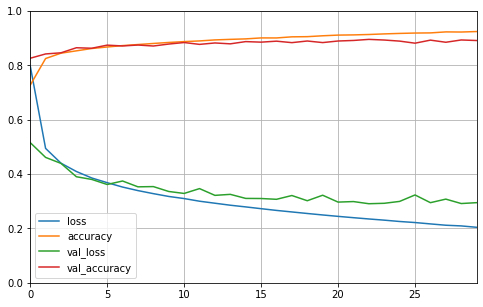

In [37]:
import pandas as pd

pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

This looks good, and convergence has been reached. Accuracy is close to validation accuracy.

In [34]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_20 (Dense)             (None, 50)                15050     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 256,660
Trainable params: 256,660
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# The same model as earlier, but with many more epochs than earlier.
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
history2 = model2.fit(X_train, y_train, epochs=300,
                   validation_data=(X_valid, y_valid))

Epoch 1/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.7084 - accuracy: 0.7669 - val_loss: 0.5026 - val_accuracy: 0.8300
Epoch 2/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.4839 - accuracy: 0.8321 - val_loss: 0.4500 - val_accuracy: 0.8406
Epoch 3/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.4399 - accuracy: 0.8459 - val_loss: 0.4070 - val_accuracy: 0.8634
Epoch 4/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.4128 - accuracy: 0.8542 - val_loss: 0.3862 - val_accuracy: 0.8682
Epoch 5/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.3939 - accuracy: 0.8612 - val_loss: 0.3728 - val_accuracy: 0.8722
Epoch 6/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.3782 - accuracy: 0.8678 - val_loss: 0.3715 - val_accuracy: 0.8708
Epoch 7/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.3648 - accuracy: 0.8711 - val_loss: 0

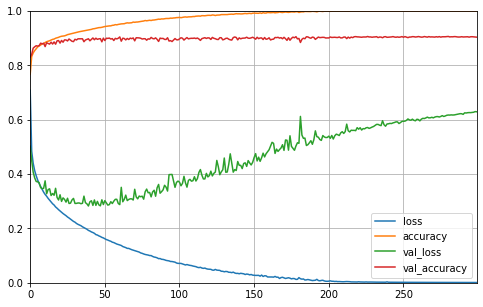

In [40]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

This looks overfitted. The accuracy is 100% but the validation accuracy is 91%.

Let's make a very deep model and see if that is better than model4, from which this is copied.

In [41]:
# A deeper model than earlier, but constraining the input layer and expanding again
model4_deep = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model4_deep.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
history4_deep = model4_deep.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.9027 - accuracy: 0.6771 - val_loss: 0.5056 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.4989 - accuracy: 0.8227 - val_loss: 0.4496 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.4333 - accuracy: 0.8442 - val_loss: 0.4210 - val_accuracy: 0.8448
Epoch 4/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.3961 - accuracy: 0.8558 - val_loss: 0.4251 - val_accuracy: 0.8400
Epoch 5/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.3704 - accuracy: 0.8645 - val_loss: 0.3599 - val_accuracy: 0.8722
Epoch 6/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.3510 - accuracy: 0.8708 - val_loss: 0.3363 - val_accuracy: 0.8832
Epoch 7/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.3335 - accuracy: 0.8776 - val_loss: 0.3296 -

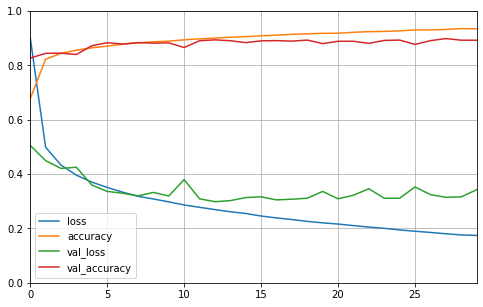

In [42]:
import pandas as pd

pd.DataFrame(history4_deep.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

So adding extra layers didn't do much good. Let's try removing layers to see what we get.

In [45]:
# A deeper model than earlier, but constraining the input layer and expanding again
model4_shallow = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model4_shallow.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
history4_shallow = model4_shallow.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 34s 20ms/step - loss: 0.7180 - accuracy: 0.7634 - val_loss: 0.4988 - val_accuracy: 0.8334
Epoch 2/30
1719/1719 [==============================] - 33s 19ms/step - loss: 0.4895 - accuracy: 0.8298 - val_loss: 0.4509 - val_accuracy: 0.8438
Epoch 3/30
1719/1719 [==============================] - 33s 19ms/step - loss: 0.4425 - accuracy: 0.8449 - val_loss: 0.4376 - val_accuracy: 0.8454
Epoch 4/30
1719/1719 [==============================] - 33s 19ms/step - loss: 0.4148 - accuracy: 0.8540 - val_loss: 0.4436 - val_accuracy: 0.8398
Epoch 5/30
1719/1719 [==============================] - 33s 19ms/step - loss: 0.3944 - accuracy: 0.8611 - val_loss: 0.4088 - val_accuracy: 0.8522
Epoch 6/30
1719/1719 [==============================] - 37s 22ms/step - loss: 0.3787 - accuracy: 0.8669 - val_loss: 0.3887 - val_accuracy: 0.8640
Epoch 7/30
1719/1719 [==============================] - 37s 21ms/step - loss: 0.3652 - accuracy: 0.8714 - val_loss: 0.3592 -

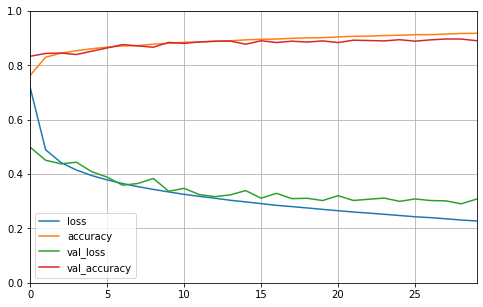

In [46]:
import pandas as pd

pd.DataFrame(history4_shallow.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

In [64]:
import pydot
keras.utils.plot_model(model4_shallow, to_file='model.png',
                       show_shapes=False, show_layer_names=True,
                       rankdir='TB', expand_nested=False, dpi=96)



('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


This is how you save a model to disk for reading later. This avoids the incredibly costly model training process.

In [65]:
model4.save('saved_models/fashion_model4')

INFO:tensorflow:Assets written to: saved_models/fashion_model4/assets


INFO:tensorflow:Assets written to: saved_models/fashion_model4/assets


This is how you load a previously-saved model from disk.

In [68]:
new_model4 = keras.models.load_model('saved_models/fashion_model4')


Let's try converting these to Tensorflow Lite. The book does not cover it, but could we use this model on an edge TPU device?

In [47]:
converter = tf.lite.TFLiteConverter.from_keras_model(model4_shallow)
tflite_model = converter.convert()


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmprp6ctj8a/assets


In [48]:
tflite_model

b'\x1c\x00\x00\x00TFL3\x00\x00\x12\x00\x1c\x00\x04\x00\x08\x00\x0c\x00\x10\x00\x14\x00\x00\x00\x18\x00\x12\x00\x00\x00\x03\x00\x00\x00\x14\x00\x00\x00 \x00\x00\x00\xb4\x00\x00\x00 \x00\x00\x00\\\x00\x00\x00\x03\x00\x00\x00\x1c\x04\x00\x00`\x03\x00\x00t\x01\x00\x00\x01\x00\x00\x00\xb8\x00\x00\x00\x0f\x00\x00\x00\\M\x10\x00XM\x10\x00\xc0G\x10\x00\xb8E\x10\x00$E\x10\x00\xb4D\x10\x00\\\xe9\x01\x00D\x14\x00\x00L\x04\x00\x008M\x10\x004M\x10\x000M\x10\x00,M\x10\x00(M\x10\x008\x00\x00\x00\x01\x00\x00\x00\x0c\x00\x00\x00\x08\x00\x0c\x00\x04\x00\x08\x00\x08\x00\x00\x00\x08\x00\x00\x00\x0e\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\xae\xb8\xef\xff\x04\x00\x00\x00\x10\x00\x00\x001.5.0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0f\x00\x00\x00MLIR Converted.\x00\x00\x00\x0e\x00\x18\x00\x04\x00\x08\x00\x0c\x00\x10\x00\x14\x00\x0e\x00\x00\x00\x14\x00\x00\x00H\x00\x00\x00L\x00\x00\x00P\x00\x00\x00d\x00\x00\x00\r\x00\x00\x008L\x10\x00\xc4K\x10\x00\x8cF\x10\x00\x90D\x10\x00\x10D\x10\x00\xa0C\x1

Ok, that was easy, but now I need an edge TPU board to load that model and make sure it actually does something.

The way to load this is to use tflite, but I need to try that out on a board.

# Regression MLP using the Sequential API

You can use NNs for regression as well. The output is ordinal, and trained on ordinal data.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
                                                housing.data, housing.target)


X_train, X_valid, y_train, y_valid = train_test_split(
                                                X_train_full, y_train_full)

scaler = StandardScaler()


In [3]:
X_train = scaler.fit_transform(X_train)
# Always use the same scaler for the X_validation and X_test!
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [4]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                   validation_data = (X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)



Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7920 - val_loss: 6.9928
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4774 - val_loss: 4.9158
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4354 - val_loss: 0.5356
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3963 - val_loss: 0.4551
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3854 - val_loss: 0.4675
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3780 - val_loss: 0.4398
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3728 - val_loss: 0.4268
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3693 - val_loss: 0.4274
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3659 - val_loss: 0.4183
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3634 - val_loss: 0.4230

# Fine-Tuning Neural Network Hyperparameters

Seems like it is difficult to tell how many layers, how many neurons, and the learning rate, so you use GridSearch on it.  Here's how for the previous example


In [5]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    "Create a model with paramters specified"
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="selu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [22]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

You can train a model using keras_reg as a model.

In [23]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
              callbacks = [keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.0770 - val_loss: 0.5662
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5687 - val_loss: 0.5256
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5594 - val_loss: 0.5102
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5414 - val_loss: 0.5037
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5196 - val_loss: 0.5376
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5158 - val_loss: 0.4919
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5117 - val_loss: 0.4880
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5094 - val_loss: 0.4853
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5005 - val_loss: 0.4891
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4977 - val_lo

NameError: name 'X_new' is not defined

Or, you can train a very computationally intensive Randomized or GridSearch here. I don't fully understand why Randomized Search is better here, but let's listen to the book and try it anyway

In [15]:
# Custom error handler for the entire notebook so stack traces are not lost
from IPython.core.ultratb import AutoFormattedTB

# initialize the formatter for making the tracebacks into strings
itb = AutoFormattedTB(mode = 'Plain', tb_offset = 1)

# Define a global with the stack trace that we can append to in the handler.
viki_stack_trace = ''

# this function will be called on exceptions in any cell
def custom_exc(shell, etype, evalue, tb, tb_offset=None):
    global viki_stack_trace

    # still show the error within the notebook, don't just swallow it
    shell.showtraceback((etype, evalue, tb), tb_offset=tb_offset)

    # grab the traceback and make it into a list of strings
    stb = itb.structured_traceback(etype, evalue, tb)
    sstb = itb.stb2text(stb)

    print (sstb) # <--- this is the variable with the traceback string
    viki_stack_trace = viki_stack_trace + sstb

# this registers a custom exception handler for the whole current notebook
get_ipython().set_custom_exc((Exception,), custom_exc)


In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime

param_distribs = {
    "n_hidden": [0, 1, 2, 3, 4, 5, 6, 7, 8],
    "n_neurons": np.arange(1, 200),  
    "learning_rate": reciprocal(3e-4, 3e-2),
}

# This is going to break.
viki_stack_trace = ''

start_time = datetime.now()
# The best estimator is only available if we 'refit=True'
rnd_cv = RandomizedSearchCV(keras_reg, param_distribs,
                            n_iter=10, cv=3, refit=True)

# Frustration upon frustration!
# Read cell below
# sklearn and Tensorflow/Keras don't play well with each other.
# You can get a Keras estimator, but cannot clone it. This does not allow
# RandomizedSearchCV to clone the best estimator and preserve it.
# And so we cannot specify refit=True.
# This has got to be one of the more frustrating parts of this 'software stack'
# Scikit-Learn makes specific assumptions, has expectations around clone.
# Tensorflow, and specifically Keras on Tensorflow doesn't work with the clone interface
# because it doesn't support copying its parameters.
#
# This whole stack is a ball of glue. When it works, you should celebrate because it
# can break at any moment.
# 
# Reference:
# https://github.com/keras-team/keras/issues/13586
# https://github.com/keras-team/keras/pull/13598


# verbose=0 removes all the noisy output from training.
rnd_cv.fit(X_train, y_train, epochs=200,
           validation_data=(X_valid, y_valid),
           callbacks=[keras.callbacks.EarlyStopping(patience=10)],
           verbose=0)

end_time = datetime.now()


121/121 [==============================] - 1s 11ms/step - loss: 0.3101


The failure disussed above

sklearn and Tensorflow/Keras don't play well with each other.
You can get a Keras estimator, but cannot clone it. This does not allow
RandomizedSearchCV to clone the best estimator and preserve it.
And so we cannot specify refit=True.
This has got to be one of the more frustrating parts of this 'software stack'
Scikit-Learn makes specific assumptions, has expectations around clone.
Tensorflow, and specifically Keras on Tensorflow doesn't work with the clone interface
because it doesn't support copying its parameters.
This whole stack is a ball of glue. When it works, you should celebrate because it
can break at any moment.

Reference:
[Issue on Keras](https://github.com/keras-team/keras/issues/13586) and [pull request to Keras to fix this discusing the issue](https://github.com/keras-team/keras/pull/13598) and another [pull request to Tensorflow to fix this issue](https://github.com/tensorflow/tensorflow/pull/41341)

A full illustration of the problem below.

In [43]:
from sklearn.base import clone

def create_keras_classifier_model(n_classes):
    """Keras multinomial logistic regression creation model
 
    Args:
        n_classes(int): Number of classes to be classified
 
    Returns:
        Compiled keras model
 
    """
    # create model
    model = keras.models.Sequential()
    model.add(keras.layersDense(n_classes, activation="softmax"))
    # Compile model
    model.compile(
        loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return model
 
estimator = keras.wrappers.scikit_learn.KerasClassifier(
    build_fn=create_keras_classifier_model, n_classes=2, class_weight={0: 1, 1:3})

viki_stack_trace = ''
clone(estimator)


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f072028c8e0>, as the constructor either does not set or modifies parameter class_weight

Traceback (most recent call last):
  File "<ipython-input-43-746317e14494>", line 26, in <module>
    clone(estimator)
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 80, in clone
    raise RuntimeError('Cannot clone object %s, as the constructor '
RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f072028c8e0>, as the constructor either does not set or modifies parameter class_weight



And this is the saved error from earlier.

In [39]:
# keras_clone_error = viki_stack_trace
print (keras_clone_error)

Traceback (most recent call last):
  File "<ipython-input-37-f8a867c26965>", line 39, in <module>
    rnd_cv.fit(X_train, y_train, epochs=200,
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_search.py", line 735, in fit
    self.best_estimator_ = clone(clone(base_estimator).set_params(
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 80, in clone
    raise RuntimeError('Cannot clone object %s, as the constructor '
RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f072c7515b0>, as the constructor either does not set or modifies parameter learning_rate



In [30]:
viki_stack_trace = ''
keras_clone_error = viki_stack_trace
print (keras_clone_error)
print(viki_stack_trace)

In [38]:
keras_clone_error = viki_stack_trace
print (keras_clone_error)


Traceback (most recent call last):
  File "<ipython-input-37-f8a867c26965>", line 39, in <module>
    rnd_cv.fit(X_train, y_train, epochs=200,
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_search.py", line 735, in fit
    self.best_estimator_ = clone(clone(base_estimator).set_params(
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 80, in clone
    raise RuntimeError('Cannot clone object %s, as the constructor '
RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f072c7515b0>, as the constructor either does not set or modifies parameter learning_rate



After the random search, you can get the best params, and the model, save it and use it for predictions.

In [36]:
# The best paramters after search
# saved_best_params = rnd_cv.best_params_
# saved_best_score = rnd_cv.best_score_
#
print(saved_best_params)
print(saved_best_score)

# Time taken
end_time - start_time

{'learning_rate': 0.005305282174548754, 'n_hidden': 7, 'n_neurons': 22}
-0.31732484698295593


datetime.timedelta(seconds=1851, microseconds=570395)

In [92]:
# best_model only exists when 'refit=True' is specified to RandomizedSearchCV, I think.
best_model = rnd_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [93]:
dir(rnd_cv)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_required_parameters',
 '_run_search',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_iter',
 'n_jobs',
 'param_distributions',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'refit',
 'return_train_score',
 'score',
 'scoring',
 'set_params',

In [94]:
rnd_cv.estimator


Longer run for later

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime

param_distribs = {
    "n_hidden": (0, 1, 2, 3, 4, 5, 6, 7, 8),
    "n_neurons": np.arange(1, 200),  
    "learning_rate": reciprocal(3e-4, 3e-2),
}

start_time = datetime.now()
# The best estimator is only available if we 'refit=True'
rnd_cv = RandomizedSearchCV(keras_reg, param_distribs,
                            n_iter=500, cv=3, refit=False)

# verbose=0 removes all the noisy output from training.
rnd_cv.fit(X_train, y_train, epochs=200,
           validation_data=(X_valid, y_valid),
           callbacks=[keras.callbacks.EarlyStopping(patience=10)],
           verbose=0)

end_time = datetime.now()


121/121 [==============================] - 0s 3ms/step - loss: 0.4414


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/callbacks.py:1664: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


121/121 [==============================] - 1s 5ms/step - loss: 0.4154


121/121 [==============================] - 0s 4ms/step - loss: 0.3468


In [ ]:
end_time - start_time